<a href="https://colab.research.google.com/github/RRahul-Abrol/Starting-with-Agentic-Ai/blob/main/graph_with_condition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import TypedDict,Literal

class Portfoliostate(TypedDict):
  amount_usd :float
  total_usd :float
  target_currency: Literal["INR","EUR"]
  total :float



In [ ]:
def calc_total(state:Portfoliostate) -> Portfoliostate:
  state['total_usd'] = state['amount_usd'] * 1.08
  return state

def convert_to_inr(state:Portfoliostate) ->Portfoliostate:
  state['total'] = state['total_usd'] * 85
  return state

def convert_to_eur(state:Portfoliostate) ->Portfoliostate:
  state['total'] = state['total_usd'] * 0.9
  return state

def choose_conversion(state:Portfoliostate) -> str:
  return state["target_currency"]

In [ ]:
from langgraph.graph import StateGraph, START, END
builder= StateGraph(Portfoliostate)

builder.add_node("calc_total_node",calc_total)
builder.add_node("convert_to_inr_node",convert_to_inr)
builder.add_node("convert_to_eur_node",convert_to_eur)

builder.add_edge(START,"calc_total_node")
builder.add_conditional_edges(
 "calc_total_node",
 choose_conversion,
 {
     "INR": "convert_to_inr_node",
     "EUR": "convert_to_eur_node"
 }
)
builder.add_edge("convert_to_eur_node",END)
builder.add_edge("convert_to_inr_node",END)

graph=builder.compile()

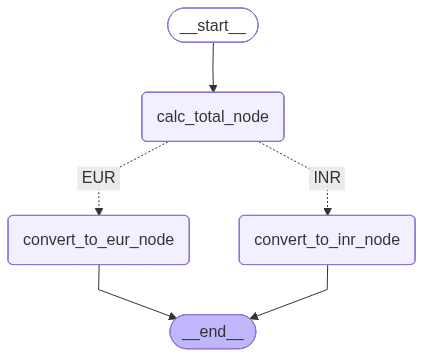

In [ ]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"amount_usd":1000, "target_currency":"EUR"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 972.0}